In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

1.Data

In [6]:
def generate_time_series(m, n_seq):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, m, 1)
    time = np.linspace(0, 1, n_seq)
    series =0.5* np.cos((time-offsets1)*(freq1*10+10))
    series +=0.3* np.sin((time-offsets2)*(freq2*20+20))
    series += 0.1 * (np.random.rand(m, n_seq)-0.5)
    return series[..., np.newaxis].astype(np.float32)

In [7]:
np.random.seed(1)
n_seq = 30
n_pred =10
series = generate_time_series(5000,n_seq + n_pred)
series.shape

(5000, 40, 1)

In [10]:
x_train=series[:3000,:n_seq]
x_valid=series[3000:4000,:n_seq]
x_test=series[4000:,:n_seq]

In [19]:
y = np.empty((5000,n_seq,n_pred))
for step_ahead in range(1,n_pred + 1):
    y[..., step_ahead - 1]=series[..., step_ahead:step_ahead + n_seq, 0]
y_train = y[:3000]
y_valid = y[3000:4000]
y_test = y[4000:]

In [20]:
x_train.shape, y_train.shape

((3000, 30, 1), (3000, 30, 10))

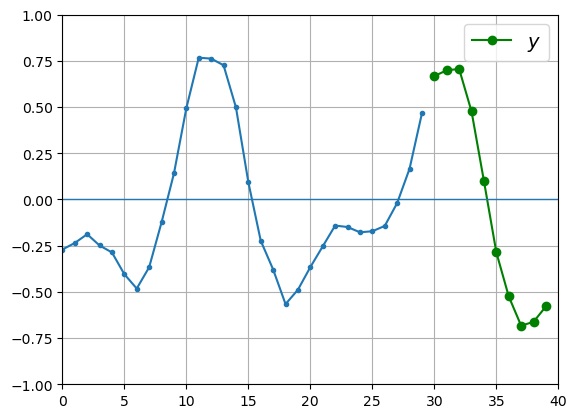

In [22]:
def plot_seq(x,y,y_pred=None):
    plt.plot(x,'.-')
    n_seq = x.shape[0]
    ahead = y.shape[0]
    plt.plot(np.arange(n_seq, n_seq + ahead), y, 'go-', label='$y$')
    if y_pred is not None:
        plt.plot(np.arange(n_seq, n_seq + ahead), y_pred, 'rx-',
        label='$lhat y$', markersize=10)
    plt.hlines(0, 0, n_seq + ahead, linewidth=1)
    plt.axis([0, n_seq + ahead, -1, 1])
    plt.grid(True)
    plt.legend(fontsize=14)

plot_seq(x_test[0, :, 0], y_test[0,-1])

LSTM

In [23]:
np.random.seed(1)
tf.random.set_seed(1)

model = keras.models.Sequential([
    keras. layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras. layers.LSTM(20, return_sequences=True),
    keras. layers.TimeDistributed(keras. layers.Dense(10))
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 20)          1760      
                                                                 
 lstm_1 (LSTM)               (None, None, 20)          3280      
                                                                 
 time_distributed (TimeDist  (None, None, 10)          210       
 ributed)                                                        
                                                                 
Total params: 5250 (20.51 KB)
Trainable params: 5250 (20.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
def last_time_step_mse(y_true,y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1], y_pred[:,-1])
model.compile(loss='mse',optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    metrics=[last_time_step_mse])

In [34]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 3s 15ms/step - loss: 0.1000 - last_time_step_mse: 0.0878 - val_loss: 0.0711 - val_last_time_step_mse: 0.0477
Epoch 2/20
94/94 [==============================] - 1s 11ms/step - loss: 0.0637 - last_time_step_mse: 0.0388 - val_loss: 0.0621 - val_last_time_step_mse: 0.0379
Epoch 3/20
94/94 [==============================] - 1s 11ms/step - loss: 0.0550 - last_time_step_mse: 0.0275 - val_loss: 0.0498 - val_last_time_step_mse: 0.0192
Epoch 4/20
94/94 [==============================] - 1s 11ms/step - loss: 0.0450 - last_time_step_mse: 0.0146 - val_loss: 0.0419 - val_last_time_step_mse: 0.0123
Epoch 5/20
94/94 [==============================] - 1s 11ms/step - loss: 0.0399 - last_time_step_mse: 0.0109 - val_loss: 0.0389 - val_last_time_step_mse: 0.0111
Epoch 6/20
94/94 [==============================] - 1s 11ms/step - loss: 0.0373 - last_time_step_mse: 0.0098 - val_loss: 0.0371 - val_last_time_step_mse: 0.0115
Epoch 7/20
94/94 [================

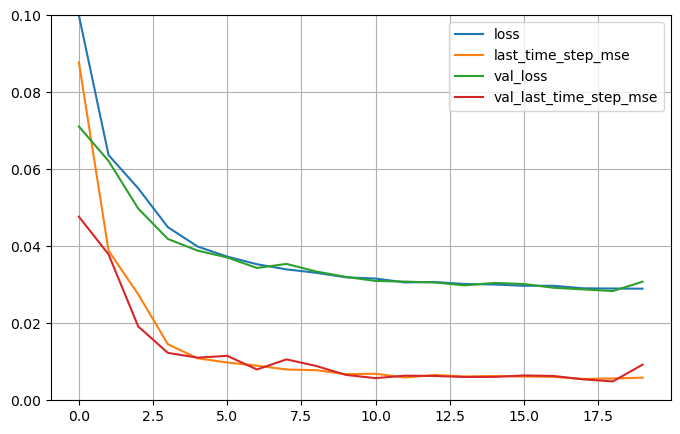

In [35]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

In [36]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.0310 - last_time_step_mse: 0.0092


[0.03102784790098667, 0.009204691275954247]

In [38]:
y_pred = model.predict(x_test)
y_test.shape,y_pred.shape

32/32 [==============================] - 0s 2ms/step


((1000, 30, 10), (1000, 30, 10))

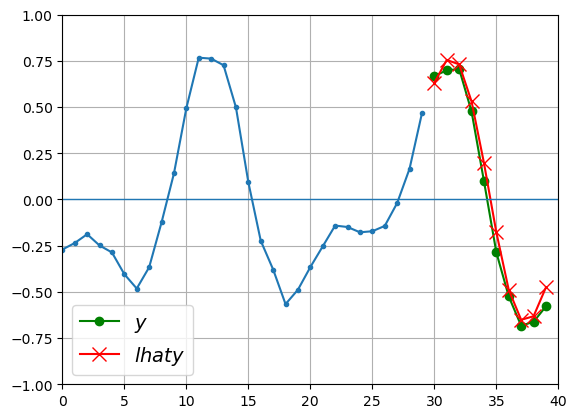

In [39]:
i = 0
plot_seq(x_test[i, :, 0], y_test[i,-1], y_pred[i,-1])

GRU

In [41]:
def generate_time_series(m, n_seq):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, m, 1)
    time = np.linspace(0, 1, n_seq)
    series =0.5* np.cos((time-offsets1)*(freq1*10+10))
    series +=0.3* np.sin((time-offsets2)*(freq2*20+20))
    series += 0.1 * (np.random.rand(m, n_seq)-0.5)
    return series[..., np.newaxis].astype(np.float32)

In [42]:
np.random.seed(1)
n_seq = 30
n_pred =10
series = generate_time_series(5000,n_seq + n_pred)
series.shape

(5000, 40, 1)

In [43]:
x_train=series[:3000,:n_seq]
x_valid=series[3000:4000,:n_seq]
x_test=series[4000:,:n_seq]

In [44]:
y = np.empty((5000,n_seq,n_pred))
for step_ahead in range(1,n_pred + 1):
    y[..., step_ahead - 1]=series[..., step_ahead:step_ahead + n_seq, 0]
y_train = y[:3000]
y_valid = y[3000:4000]
y_test = y[4000:]

In [45]:
x_train.shape, y_train.shape

((3000, 30, 1), (3000, 30, 10))

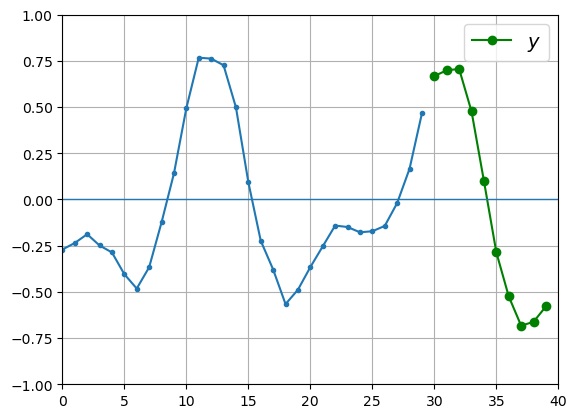

In [46]:
def plot_seq(x,y,y_pred=None):
    plt.plot(x,'.-')
    n_seq = x.shape[0]
    ahead = y.shape[0]
    plt.plot(np.arange(n_seq, n_seq + ahead), y, 'go-', label='$y$')
    if y_pred is not None:
        plt.plot(np.arange(n_seq, n_seq + ahead), y_pred, 'rx-',
        label='$lhat y$', markersize=10)
    plt.hlines(0, 0, n_seq + ahead, linewidth=1)
    plt.axis([0, n_seq + ahead, -1, 1])
    plt.grid(True)
    plt.legend(fontsize=14)

plot_seq(x_test[0, :, 0], y_test[0,-1])

In [47]:
np.random.seed(1)
tf.random.set_seed(1)

model = keras.models.Sequential([
    keras.layers.GRU(20,return_sequences=True,input_shape=[None, 1]),
    keras.layers.GRU(20,return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 20)          1380      
                                                                 
 gru_1 (GRU)                 (None, None, 20)          2520      
                                                                 
 time_distributed_1 (TimeDi  (None, None, 10)          210       
 stributed)                                                      
                                                                 
Total params: 4110 (16.05 KB)
Trainable params: 4110 (16.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
def last_time_step_mse(y_true,y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1], y_pred[:,-1])
model.compile(loss='mse',optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    metrics=[last_time_step_mse])

In [50]:
train=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
94/94 [==============================] - 3s 16ms/step - loss: 0.0994 - last_time_step_mse: 0.0929 - val_loss: 0.0860 - val_last_time_step_mse: 0.0762
Epoch 2/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0774 - last_time_step_mse: 0.0638 - val_loss: 0.0766 - val_last_time_step_mse: 0.0631
Epoch 3/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0624 - last_time_step_mse: 0.0414 - val_loss: 0.0560 - val_last_time_step_mse: 0.0316
Epoch 4/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0512 - last_time_step_mse: 0.0253 - val_loss: 0.0454 - val_last_time_step_mse: 0.0181
Epoch 5/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0428 - last_time_step_mse: 0.0158 - val_loss: 0.0408 - val_last_time_step_mse: 0.0138
Epoch 6/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0394 - last_time_step_mse: 0.0133 - val_loss: 0.0388 - val_last_time_step_mse: 0.0129
Epoch 7/20
94/94 [================

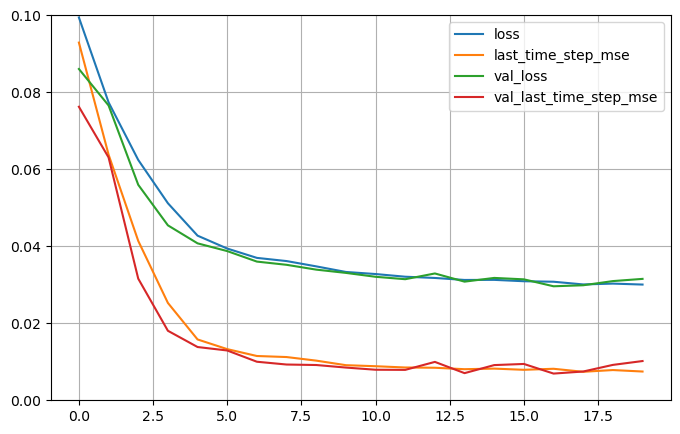

In [51]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,0.1)
plt.show()

In [52]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0318 - last_time_step_mse: 0.0100


[0.03176846355199814, 0.010009417310357094]

In [53]:
y_pred = model.predict(x_test)
y_test.shape,y_pred.shape

32/32 [==============================] - 0s 2ms/step


((1000, 30, 10), (1000, 30, 10))

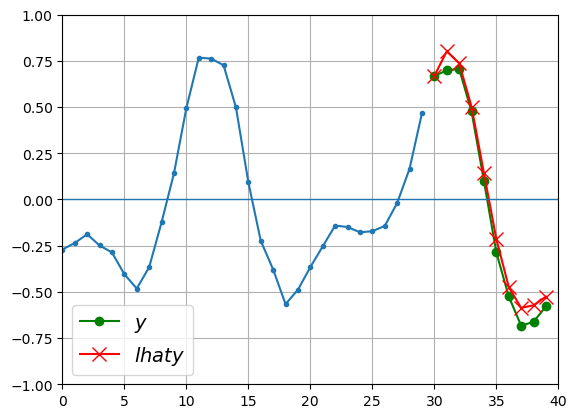

In [54]:
i = 0
plot_seq(x_test[i, :, 0], y_test[i,-1], y_pred[i,-1])